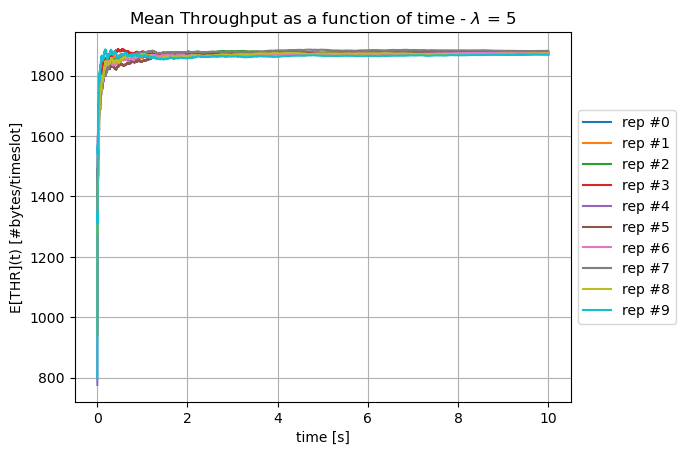

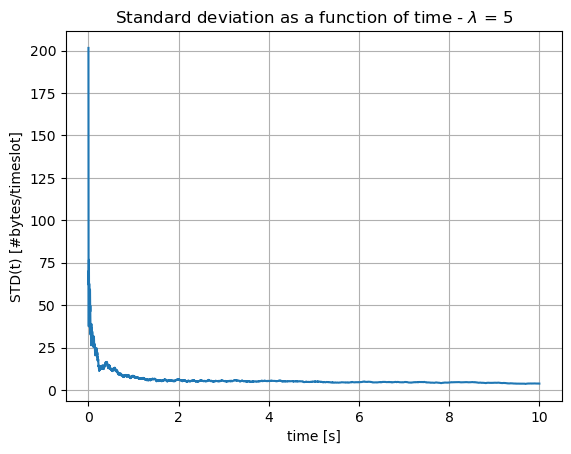

WARM UP TIME: 
1.745

SIMULATION TIME: 
9.995


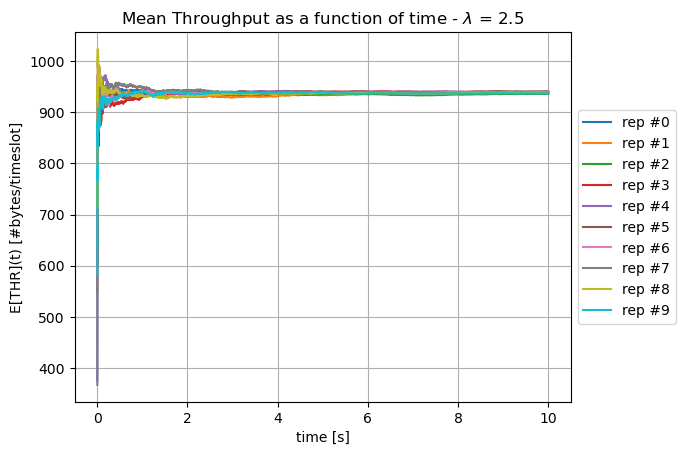

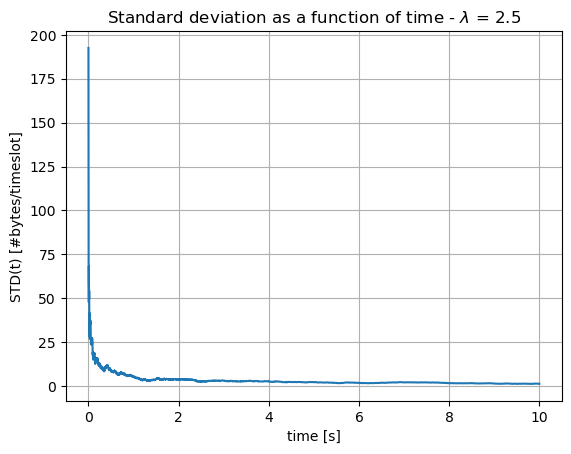

WARM UP TIME: 
0.78

SIMULATION TIME: 
9.994


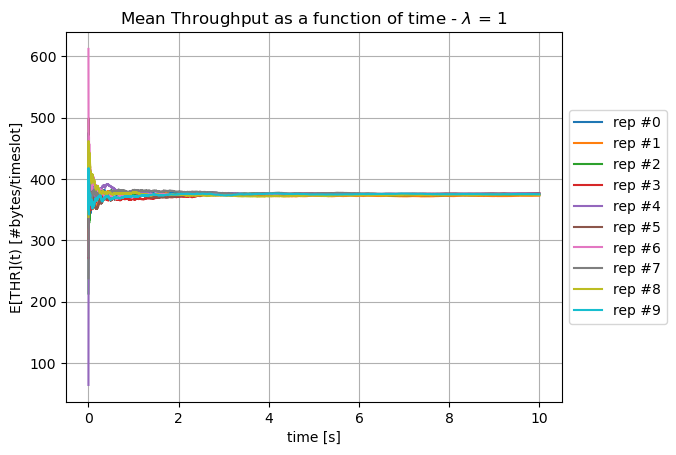

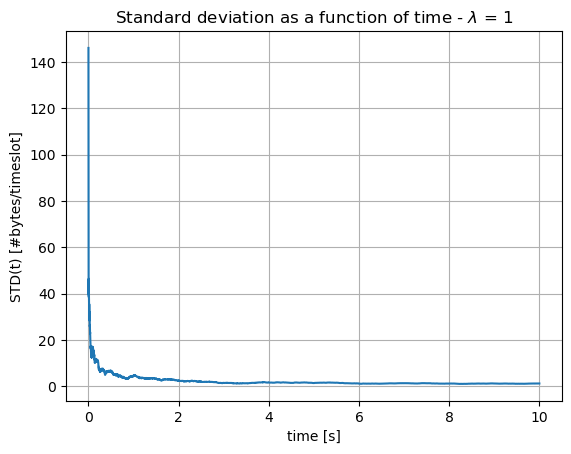

WARM UP TIME: 
0.447

SIMULATION TIME: 
9.962


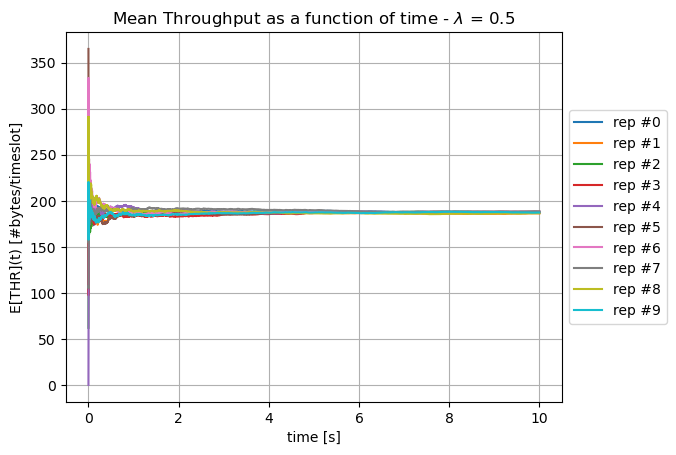

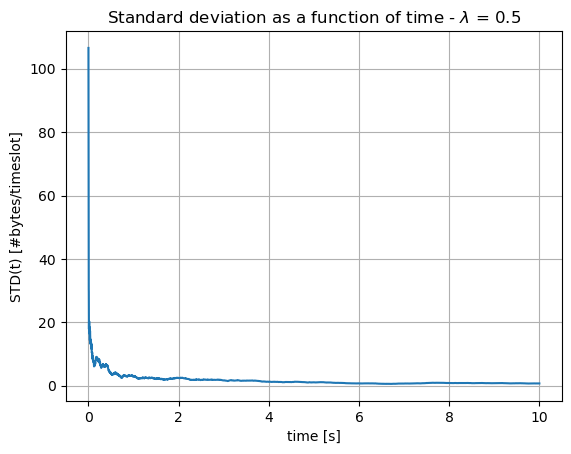

WARM UP TIME: 
0.47

SIMULATION TIME: 
9.926


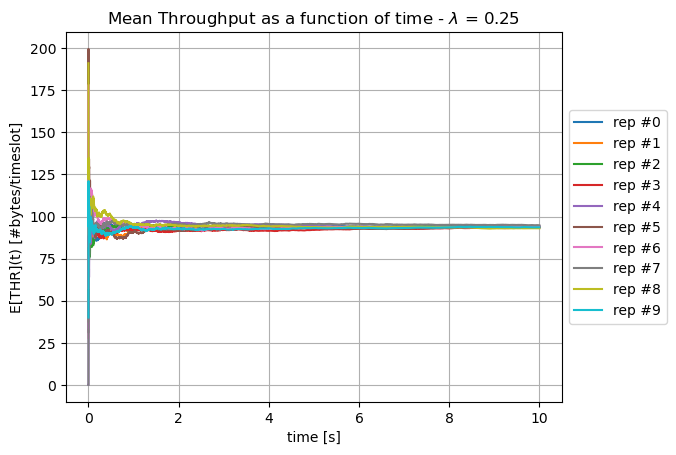

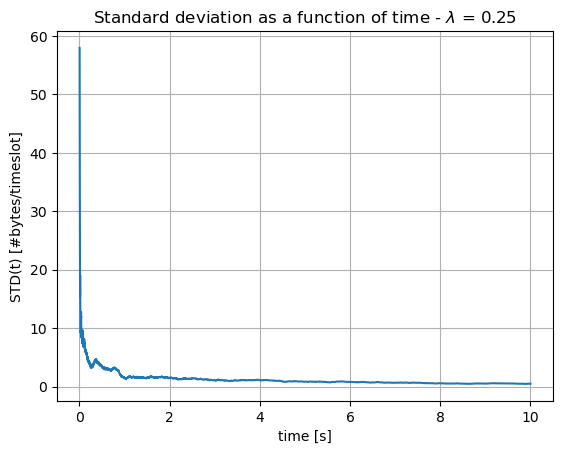

WARM UP TIME: 
0.181

SIMULATION TIME: 
7.278


In [4]:
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl 
import scipy.stats as st
import matplotlib.pyplot as plt

path     = './'
rate     = ['5','2_5','1','0_5','0_25']
_rate    = [5,2.5,1,0.5,0.25]
csv_name = './warmuptime_lambda'
times    = []

def main():

        for l in range(0,len(rate)):
        # start 'for l in range(0,len(rate)):'
            
            # parse csv
            raw = pd.read_csv(path + csv_name + str(rate[l]) + '.csv')
            
            # compute vector of mean values     
            vec_mean_cell = [[],[],[],[],[],[],[],[],[],[]]

            for rep in range(0,10):
            # start 'for rep in range(0,10):'
                vec_mean_cell[rep] = []

                times = raw[raw.columns[2*rep]]
                array = raw[raw.columns[2*rep+1]]   

                for i in range(0,len(array)):
                    temp = array[0:i]
                    vec_mean_cell[rep].append(np.mean(temp))

                plt.plot(times, vec_mean_cell[rep], label=raw.columns[2*rep]) 
                    
                if rep == 9:
                    plt.title('Mean Throughput as a function of time - $\lambda$ = ' + str(_rate[l]))
                    plt.grid(True)
                    plt.xlabel('time [s]')
                    plt.ylabel('E[THR](t) [#bytes/timeslot]')
                    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
                    plt.savefig('./plots/E[THR](t)_lambda' + str(rate[l]) + '.png', bbox_inches='tight')
                    plt.show()
            # end 'for rep in range(0,10):'
            
            global_std      = []
            warmup_time    = 0
            simulation_time = 10

            for i in range(0, len(times)):
            # start 'for i in range(0, len(times)):'
                global_mean_i = []

                for j in range(0, 10):
                # start 'for j in range(0, 10):'
                    global_mean_i.append(vec_mean_cell[j][i])
                # end 'for j in range(0, 10):'

                global_std.append(np.std(global_mean_i))

                if i != 0:
                    if abs(global_std[i-1] - global_std[i]) >= 0.25:
                        warmup_time = times[i]
                    if abs(global_std[i-1] - global_std[i]) >= 0.01:
                        simulation_time = times[i]
             # end 'for i in range(0, len(times)):'

            plt.plot(times, global_std)
            plt.grid(True)
            plt.title('Standard deviation as a function of time - $\lambda$ = ' + str(_rate[l]))
            plt.xlabel('time [s]')
            plt.ylabel('STD(t) [#bytes/timeslot]')
            plt.savefig('./plots/std(t)_lambda' + str(rate[l]) + '.png', bbox_inches='tight')
            plt.show()

            print("WARM UP TIME: ")
            print(warmup_time)
            print()
            print("SIMULATION TIME: ")
            print(simulation_time)
            
            # end 'for l in range(0,len(rate)):'

if __name__ == '__main__':
    main()